In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from matplotlib import pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Height_weight_assignment/Height-Weight Data.csv") # Loading the dataset

In [4]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [5]:
df.head(50)

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801
5,67.253016,152.212156
6,68.785081,183.927889
7,68.348516,167.971111
8,67.018950,175.929440
9,63.456494,156.399676


In [6]:
df.tail()

,Height,Weight
3496,69.296830,185.649086
3497,70.542201,210.198845
3498,73.912549,202.429960
3499,67.396021,144.277671
3500,72.738970,187.222909


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [8]:
df.shape

(3501, 2)

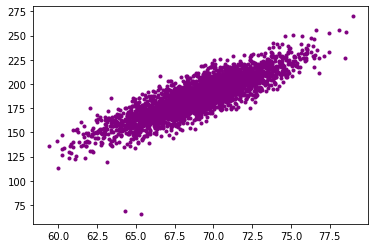

In [9]:
plt.scatter(df['Height'], df['Weight'], color='purple', marker='.') # Drawing the scatter plot of whole dataset that shows the relationship between variables

Text(0, 0.5, 'Weight in pound')

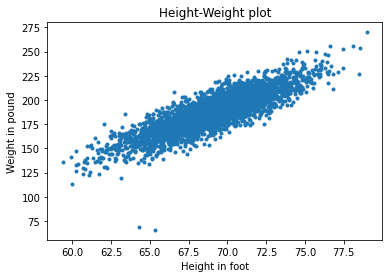

In [10]:
plt.scatter(df['Height'], df['Weight'], marker='.')
plt.title("Height-Weight plot")
plt.xlabel("Height in foot")
plt.ylabel("Weight in pound")

In [11]:
df.Height.mean() # Finding the mean value of 'Height' column

69.02441087268781

In [12]:
df.Weight.mean() # Finding the mean value of 'Weight' column

186.891257979463

## **Separating dependent and independent variable**

In [13]:
x = df[['Height']]

In [14]:
y = df[['Weight']]

In [15]:
x.head()

,Height
0,73.847017
1,68.781904
2,74.110105
3,71.730978
4,69.881796


In [16]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


## **Splitting the dataset**

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.7)

In [19]:
xtrain.head()

,Height
12,64.766329
1342,66.470246
678,63.546370
2090,69.329603
1208,71.288844


In [20]:
xtest.head()

,Height
3456,70.315049
2738,65.273539
391,65.575772
1302,70.984071
115,73.685193


In [21]:
ytrain.head()

,Weight
12,167.127461
1342,182.468057
678,150.346658
2090,180.358843
1208,190.077998


In [22]:
ytest.head()

,Weight
3456,192.967756
2738,149.934606
391,173.691592
1302,192.111320
115,223.270004


In [23]:
xtrain.shape

(2450, 1)

In [24]:
xtest.shape

(1051, 1)

## **Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression

In [26]:
reg = LinearRegression()

In [27]:
reg.fit(xtrain, ytrain) # Model fitting

LinearRegression()

In [28]:
reg.predict([[73.847017]]) # Predicting the corresponding value of weight for a random value of height

array([[215.40808793]])

In [29]:
xtest.head()

,Height
3456,70.315049
2738,65.273539
391,65.575772
1302,70.984071
115,73.685193


In [30]:
ypred = reg.predict(xtest)
ypred

array([[194.46452894],
       [164.56981504],
       [166.36196552],
       ...,
       [199.24212323],
       [183.67419108],
       [213.11087487]])

In [31]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [32]:
mse = mean_squared_error(ytest, ypred) # Finding the mean squared error (mse) of test dataset
mse

104.96027664612716

In [33]:
mae = mean_absolute_error(ytest, ypred) # Finding the mean absolute error (mae) of test dataset
mae

7.916471201948644

In [34]:
m = reg.coef_
m

array([[5.92971429]])

In [35]:
c = reg.intercept_
c

array([-222.48362415])

In [36]:
result = m*73.847017 + c
result

array([[215.40808793]])

## **Best fit line**

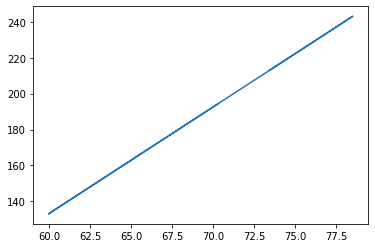

In [37]:
plt.plot(xtest, reg.predict(xtest))

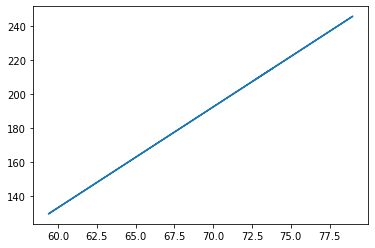

In [38]:
plt.plot(df[['Height']], reg.predict(df[['Height']]))

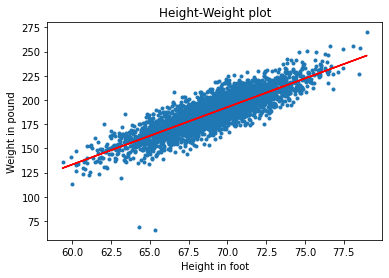

In [39]:
plt.scatter(df['Height'], df['Weight'], marker='.')
plt.title("Height-Weight plot")
plt.xlabel("Height in foot")
plt.ylabel("Weight in pound")
plt.plot(df[['Height']], reg.predict(df[['Height']]), color='red')

In [40]:
reg.score(xtrain, ytrain) # Training accuracy

0.7316380200706918

In [41]:
reg.score(xtest, ytest) # Testing accuracy

0.7339308601717502